In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count
import FinanceDataReader as fdr


import requests
import pandas as pd


def stock_to_df(code):
    stock = code
    response = requests.get("https://m.stock.naver.com/api/item/getPriceDayList.nhn?code={}&pageSize=10000&page=1".format(stock))

    df_stock = pd.DataFrame(response.json()["result"]["list"])
    df_stock.index = pd.to_datetime(df_stock["dt"], format="%Y%m%d").reset_index(drop=True)
    df_stock = df_stock.sort_index().drop("dt", axis=1)
    print("{} done.".format(code), end="\t")
    return df_stock

def pool_crawl(stock_list):
    pool = Pool(processes=(cpu_count() - 1))
    results = pool.map(stock_to_df, stock_list)
    pool.close()
    pool.join()
    return results




kospi_info = pd.read_csv("./market_info/kospi.csv", index_col=0)
kosdaq_info = pd.read_csv("./market_info/kosdaq.csv", index_col=0)
date_info = pd.read_csv("./market_info/date_df.csv", index_col=0)["dt"]
date_info = pd.to_datetime(date_info, format="%Y%m%d").sort_values(ascending=True).reset_index(drop=True)

kospi_list = fdr.StockListing("KOSPI")["Symbol"]
kosdaq_list = fdr.StockListing("KOSDAQ")["Symbol"]

df_kospi = pool_crawl(kospi_list)
df_kosdaq = pool_crawl(kosdaq_list)

df_open_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_close_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_high_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_low_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_rtn_kospi = pd.DataFrame(columns=kospi_list, index=date_info)
df_vol_kospi = pd.DataFrame(columns=kospi_list, index=date_info)


df_open_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_close_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_high_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_low_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_rtn_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)
df_vol_kosdaq = pd.DataFrame(columns=kosdaq_list, index=date_info)

for x, y in zip(df_kospi, kospi_list):
    df_open_kospi[y] = x["ov"]
    df_close_kospi[y] = x["ncv"]
    df_high_kospi[y] = x["hv"]
    df_low_kospi[y] = x["lv"]
    df_rtn_kospi[y] = x["cr"] / 100
    df_vol_kospi[y] = x["aq"]

for x, y in zip(df_kosdaq, kosdaq_list):
    df_open_kosdaq[y] = x["ov"]
    df_close_kosdaq[y] = x["ncv"]
    df_high_kosdaq[y] = x["hv"]
    df_low_kosdaq[y] = x["lv"]
    df_rtn_kosdaq[y] = x["cr"] / 100
    df_vol_kospi[y] = x["aq"]
    
    
df_open_kospi.to_csv("./kospi_open.csv")
df_close_kospi.to_csv("./kospi_close.csv")
df_high_kospi.to_csv("./kospi_high.csv")
df_low_kospi.to_csv("./kospi_low.csv")
df_rtn_kospi.to_csv("./kospi_rtn.csv")
df_vol_kospi.to_csv("./kospi_vol.csv")

df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")
df_open_kospi.to_csv("./kospi_open.csv")

001380 done.	034730 done.	011790 done.	014280 done.	002990 done.	214330 done.	004270 done.	251270 done.	006370 done.	000210 done.	009190 done.	047040 done.	001070 done.	001440 done.	084010 done.	016090 done.	007590 done.	102260 done.	002200 done.	123890 done.	025890 done.	020000 done.	004150 done.	011700 done.	006390 done.	097230 done.	012450 done.	005440 done.	267250 done.	094280 done.	298000 done.	005870 done.	095570 done.	000990 done.	069730 done.	039570 done.	089470 done.	092220 done.	001940 done.	092230 done.	003550 done.	229640 done.	100840 done.	003570 done.	036530 done.	006120 done.	096770 done.	005610 done.	002710 done.	012320 done.	013580 done.	001140 done.	074610 done.	005720 done.	004170 done.	031430 done.	003410 done.	008700 done.	005850 done.	023960 done.	009810 done.	002630 done.	001800 done.	118000 done.	077500 done.	102460 done.	007110 done.	007570 done.	044380 done.	003780 done.	002780 done.	109070 done.	003220 done.	002880 done.	005880 done.	001620 done.	023450 done.

003240 done.	004100 done.	039130 done.	036460 done.	006200 done.	002300 done.	023350 done.	000970 done.	104700 done.	168490 done.	060980 done.	128940 done.	105630 done.	009180 done.	300720 done.	002220 done.	002320 done.	009460 done.	003460 done.	003120 done.	001550 done.	063160 done.	010580 done.	010640 done.	051630 done.	044820 done.	005070 done.	007980 done.	078000 done.	004870 done.	016800 done.	005810 done.	099340 done.	071090 done.	005430 done.	004090 done.	079160 done.	012030 done.	005830 done.	007700 done.	007070 done.	234080 done.	009440 done.	032640 done.	066570 done.	010120 done.	071970 done.	002100 done.	009290 done.	030610 done.	007690 done.	073240 done.	000270 done.	025860 done.	025530 done.	003060 done.	006740 done.	012160 done.	070960 done.	095720 done.	021240 done.	000700 done.	072130 done.	008730 done.	214320 done.	139480 done.	000760 done.	006490 done.	023810 done.	013360 done.	003200 done.	103590 done.	192400 done.	015590 done.	006890 done.	009410 done.	214420 done.

122450 done.	114450 done.	065150 done.	024940 done.	950110 done.	184230 done.	063440 done.	289080 done.	089230 done.	900280 done.	014200 done.	026910 done.	006050 done.	060480 done.	187790 done.	039860 done.	293580 done.	168330 done.	089140 done.	126870 done.	144960 done.	900100 done.	020400 done.	007720 done.	045390 done.	290120 done.	078600 done.	096350 done.	263600 done.	263800 done.	099410 done.	145020 done.	037440 done.	241520 done.	254120 done.	264850 done.	276920 done.	036120 done.	099220 done.	307070 done.	057500 done.	036490 done.	079940 done.	039240 done.	121440 done.	267320 done.	043650 done.	204620 done.	019660 done.	091970 done.	051490 done.	242040 done.	138610 done.	007390 done.	033640 done.	144510 done.	036480 done.	303030 done.	108380 done.	065690 done.	140520 done.	131220 done.	045100 done.	066110 done.	204990 done.	092300 done.	064240 done.	126640 done.	290270 done.	024060 done.	238490 done.	245620 done.	079190 done.	900290 done.	067290 done.	035900 done.	218410 done.

In [2]:
import requests
import FinanceDataReader as fdr
from bs4 import BeautifulSoup

listings = fdr.StockListing("KRX")

pages = range(1, 22)
kospi_200 = list()
for x in pages:
    url = "http://finance.naver.com/sise/entryJongmok.nhn?&page={}".format(x)
    result = requests.get(url)
    soup = BeautifulSoup(result.text, "lxml")
    items = soup.find_all("td", {"class": "ctg"})
    for item in items:
        kospi_200.append(item.text)
kospi_200 = set(kospi_200)
kospi_200_codes = listings[listings["Name"].isin(kospi_200)]["Symbol"].astype("str").reset_index(drop=True)

kospi_200_codes.to_csv("./kospi_200_list/kospi_200_list.csv")

In [3]:

df_kospi_high = pd.read_csv("./naver_stock/kospi_high.csv", index_col="dt")
df_kosdaq_high = pd.read_csv("./naver_stock/kosdaq_high.csv", index_col="dt")

df_kospi_low = pd.read_csv("./naver_stock/kospi_low.csv", index_col="dt")
df_kosdaq_low = pd.read_csv("./naver_stock/kosdaq_low.csv", index_col="dt")

df_kospi_close = pd.read_csv("./naver_stock/kospi_close.csv", index_col="dt")
df_kosdaq_close = pd.read_csv("./naver_stock/kosdaq_close.csv", index_col="dt")

### z_socre
df_kospi_close_std = df_kospi_close.rolling(21).std()
df_kospi_close_sma = df_kospi_close.rolling(21).mean()
df_kospi_z = (df_kospi_close - df_kospi_close_sma) / df_kospi_close_std

df_kosdaq_close_std = df_kosdaq_close.rolling(21).std()
df_kosdaq_close_sma = df_kosdaq_close.rolling(21).mean()
df_kosdaq_z = (df_kosdaq_close - df_kosdaq_close_sma) / df_kosdaq_close_std

df_kospi_z.to_csv("./techinical_indicators/kospi_z.csv")
df_kosdaq_z.to_csv("./techinical_indicators/kosdaq_z.csv")

### stochastic oscillator
lookback = 14
df_kospi_hh = df_kospi_high.rolling(lookback).max()
df_kosdaq_hh = df_kosdaq_high.rolling(lookback).max()




In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url_1 = "http://marketdata.krx.co.kr/contents/COM/GenerateOTP.jspx?name=fileDown&filetype=csv&url=MKD/13/1301/13010302/mkd13010302&type=6&ind_type=1300&period_strt_dd=20000101&period_end_dd=30001231&pagePath=%2Fcontents%2FMKD%2F13%2F1301%2F13010302%2FMKD13010302.jsp"
response = requests.get(url_1)

url_2 = "http://file.krx.co.kr/download.jspx"
json_data = {
    "code" : response.content
}
headers_json = {
    "Referer": "http://marketdata.krx.co.kr/contents/MKD/99/MKD99000001.jspx"
}
columns = ["dt", "close", "change", "rate", "open", "high", "low"]
data = requests.post(url_2, data=json_data, headers=headers_json)
parsing = BeautifulSoup(data.text)
parsing_df = parsing.text.split("\n")
parsing_df = [x.split(",") for x in parsing_df]

parsing = BeautifulSoup(data.text)
parsing_df = parsing.text.split("\n")
parsing_df = [x.split(",") for x in parsing_df]
parsing_df = pd.DataFrame(parsing_df[1:], columns=columns)
parsing_df.index = parsing_df["dt"]
parsing_df.drop("dt", axis=1, inplace=True)

def to_float(element):
    if (type(element) == str) and (len(element) != 0):
        res = element.replace('\"', "")
        return float(res)

for column in parsing_df.columns:
    parsing_df[column] = parsing_df[column].apply(to_float).astype("float32")
    
parsing_df["rate"] /= 100
parsing_df.index = pd.to_datetime(parsing_df.index, format='"%Y/%m/%d"')
parsing_df.to_csv("./krx_web/vkospi_d.csv")

/home/chanmin/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /home/chanmin/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [8]:
parsing_df

,close,change,rate,open,high,low
dt,,,,,,
2019-04-19,12.450000,-0.400000,-0.0311,12.71,12.83,12.44
2019-04-18,12.850000,0.200000,0.0158,12.88,13.13,12.78
2019-04-17,12.650000,-0.010000,-0.0008,12.81,12.82,12.65
2019-04-16,12.660000,-0.260000,-0.0201,13.04,13.08,12.62
2019-04-15,12.920000,0.510000,0.0411,12.84,13.04,12.78
2019-04-12,12.410000,0.120000,0.0098,12.70,12.76,12.33
2019-04-11,12.290000,-18.110001,-0.5957,12.62,12.63,12.10
2019-04-10,30.400000,17.730000,1.3994,12.91,30.41,12.61
2019-04-09,12.670000,-0.480000,-0.0365,13.10,13.19,12.65


In [23]:
import matplotlib.pyplot as plt

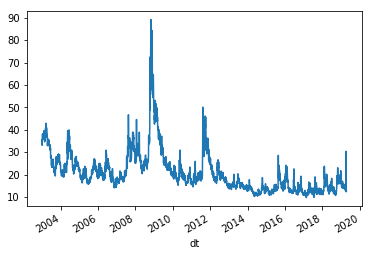

In [6]:
parsing_df["close"].plot()
plt.show()

In [25]:
!touch vkospi.py

In [208]:
df_rtn_kospi.loc["2010-01-01":].dropna(how="any", axis=1)

Symbol,001250,001390,011070,010060,001740,024070,011420,010130,002240,014530,...,000880,010620,004310,005380,011760,009540,093240,004800,000540,003280
dt,,,,,,,,,,,,,,,,,,,,,
2010-01-04,-0.013514,0.039801,0.008073,-0.016018,0.042857,0.000000,0.149333,-0.012255,-0.017903,-0.022472,...,0.029289,-0.009709,-0.004357,-0.016529,-0.023697,-0.008646,-0.004942,0.001174,0.053846,-0.007246
2010-01-05,0.000000,0.009569,0.096096,-0.006977,0.013699,-0.001242,-0.008121,0.024814,-0.007812,-0.005747,...,0.003049,-0.031373,-0.004376,-0.075630,0.000000,-0.005814,0.038079,0.035170,-0.032117,-0.007299
2010-01-06,0.050228,-0.004739,0.013699,0.014052,0.004505,0.002488,-0.005848,-0.009685,-0.002625,0.005780,...,0.025329,0.022267,0.010989,0.009091,0.067961,0.038012,0.004785,0.049830,0.009050,-0.007353
2010-01-07,0.013043,0.023810,-0.058559,0.009238,-0.004484,0.007444,-0.012941,0.031785,-0.018421,0.000000,...,-0.003953,0.148515,-0.006522,-0.045045,-0.013636,0.092958,-0.009524,-0.031284,-0.028401,0.081481
2010-01-08,0.051502,0.004651,0.028708,0.038902,0.054054,-0.002463,-0.003576,-0.021327,0.020107,0.002874,...,0.003968,0.099138,-0.008753,0.000000,0.041475,0.056701,0.011218,0.035635,-0.009231,-0.006849
2010-01-11,0.000000,-0.013889,-0.023256,-0.030837,-0.004274,-0.003704,0.095694,-0.038741,-0.010512,0.014327,...,-0.009881,0.015686,0.000000,-0.042453,-0.011062,0.004878,0.044374,0.002151,0.004658,-0.020690
2010-01-12,0.012245,0.046948,0.047619,-0.015909,-0.021459,0.000000,-0.007642,0.022670,0.001328,-0.022599,...,-0.012974,-0.023166,0.006623,0.014778,0.008949,-0.009709,-0.004552,-0.004292,0.004637,0.000000
2010-01-13,-0.008065,0.049327,0.000000,-0.027714,-0.017544,-0.004957,-0.075908,-0.049261,0.003979,-0.026012,...,-0.026289,-0.047431,-0.004386,-0.009709,-0.002217,-0.056373,-0.050305,-0.030172,0.000000,-0.014085
2010-01-14,0.089431,0.089744,-0.059091,-0.019002,0.017857,0.000000,-0.040476,-0.010363,-0.021136,0.011869,...,0.036345,0.012448,0.000000,0.014706,0.000000,0.059740,0.009631,0.018889,0.007692,0.000000


In [154]:
cov_m = df_test.cov()

In [187]:
def pcaWeights(cov, risk_dist=None, risk_target=1.):
    e_val, e_vec = np.linalg.eigh(cov)
    indices = e_val.argsort()[::-1]
    e_val, e_vec = e_val[indices], e_vec[:, indices]
    if risk_dist is None:
        risk_dist = np.zeros(cov.shape[0])
        risk_dist[-1] = 1.
    loads = risk_target * (risk_dist / e_val) ** .5
    weights = np.dot(e_vec, np.reshape(loads, (-1, 1)))
    print(risk_dist == (loads/risk_target) ** 2 * e_val)
    return weights

In [210]:
risk_weight = np.ones(cov_m.shape[0])

weights = pcaWeights(cov_m, risk_target=1)

weights = pd.Series(weights.flatten(), index=df_test.columns)

weights = weights / weights.abs()

[ True  True  True  True  True  True  True  True  True  True]


In [211]:
weights

Symbol
005930   -1.0
000660    1.0
005380    1.0
068270   -1.0
051910    1.0
005490   -1.0
012330   -1.0
051900   -1.0
055550    1.0
028260    1.0
dtype: float64

In [212]:
std_weight = 1 / df_test.std()
std_weight = std_weight / std_weight.sum()
std_weight

Symbol
005930    0.118826
000660    0.083637
005380    0.100842
068270    0.060985
051910    0.097457
005490    0.095574
012330    0.094740
051900    0.089536
055550    0.141274
028260    0.117128
dtype: float64

0.10619588404387033 0.14724136389522582 0.7212367587102583


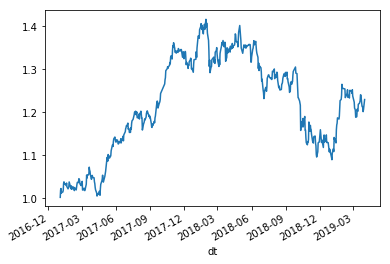

In [213]:
mean_ = df_test.multiply(std_weight).sum(axis=1).mean()*252
std_ = df_test.multiply(std_weight).sum(axis=1).std()*(252**0.5)
print(mean_, std_, mean_ / std_)
(df_test.multiply(std_weight).sum(axis=1) + 1).cumprod().plot()

-0.3691874706252286 0.8280944992072027 -0.44582770562862045


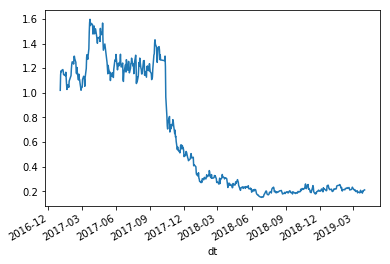

In [214]:
mean_ = df_test.multiply(weights).sum(axis=1).mean()*252
std_ = df_test.multiply(weights).sum(axis=1).std()*(252**0.5)
print(mean_, std_, mean_ / std_)

(df_test.multiply(weights).sum(axis=1) + 1).cumprod().plot()

0.12766527109908601
0.1525994514087239


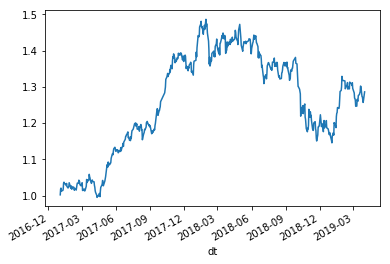

In [200]:
print(df_test.mean(axis=1).mean() * 252)
print(df_test.mean(axis=1).std() * (252**0.5))
(df_test.mean(axis=1) + 1).cumprod().plot()

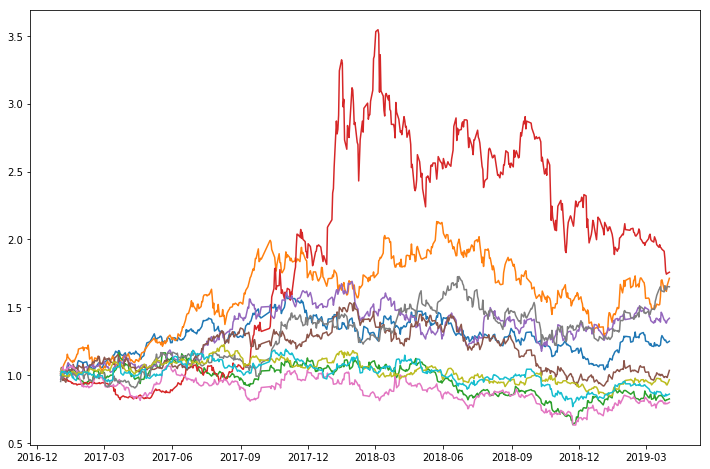

In [195]:
plt.figure(figsize=(12,8))
plt.plot((df_test+1).cumprod())

In [34]:
indices = e_val.argsort()[::-1]

In [35]:
indices

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [36]:
e_val

array([9.17985224e-05, 1.49363717e-04, 1.60682057e-04, 2.18306757e-04,
       2.88486673e-04, 4.21095721e-04, 4.30970819e-04, 7.11674043e-04,
       9.64490513e-04, 1.41386563e-03])

In [37]:
e_val, e_vec = e_val[indices], e_vec[:, indices]

In [38]:
pd.DataFrame(e_val)

,0
0,0.001414
1,0.000964
2,0.000712
3,0.000431
4,0.000421
5,0.000288
6,0.000218
7,0.000161
8,0.000149
9,0.000092


In [39]:
pd.DataFrame(e_vec)

,0,1,2,3,4,5,6,7,8,9
0,-0.157526,0.295366,0.330711,-0.144336,0.121655,0.037535,-0.220969,0.146501,-0.004773,0.819281
1,-0.249988,0.318240,0.595051,-0.191210,0.422622,-0.051623,0.248532,0.075871,0.003708,-0.443586
2,-0.120706,0.295712,-0.441647,-0.240424,0.210535,0.043588,0.093635,-0.112379,-0.759814,0.013764
3,-0.814643,-0.551105,-0.076139,-0.124832,0.004638,-0.071048,0.035990,0.042385,-0.004931,0.055457
4,-0.239870,0.282356,0.091399,-0.104366,-0.637688,0.616893,0.215008,-0.072327,0.022592,-0.065713
5,-0.219807,0.361624,0.011565,0.201211,-0.418506,-0.724878,0.139986,-0.242690,0.001495,0.034660
6,-0.124217,0.337772,-0.554377,-0.234511,0.234567,0.001413,0.220568,0.123433,0.622412,0.042957
7,-0.273748,0.193893,-0.096259,0.862557,0.263462,0.250780,-0.024754,0.030420,-0.018096,0.005448
8,-0.072624,0.153438,-0.093078,-0.000080,-0.233816,-0.127113,-0.350087,0.836433,-0.117825,-0.235857
9,-0.181615,0.186001,-0.044092,-0.137263,0.036717,0.062629,-0.801057,-0.422428,0.143187,-0.256364


In [41]:
riskDist = np.zeros(cov_m.shape[0])
riskDist [-1] = 1

In [42]:
loads = 1 * (riskDist / e_val) ** 5

In [43]:
loads

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.53398653e+20])

In [44]:
np.reshape(loads, (-1, 1))

array([[0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.53398653e+20]])